In [1]:
import pyrebase

In [2]:
import config
import json
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import time
import numpy as np

%matplotlib inline

In [3]:
config.url

'surveybox-fe69c'

In [4]:
firebase

NameError: name 'firebase' is not defined

In [5]:
config = {
  "apiKey": "apiKey",
  "authDomain": "projectId.firebaseapp.com",
  "databaseURL": "https://surveybox-fe69c.firebaseio.com",
  "storageBucket": "projectId.appspot.com"}

firebase = pyrebase.initialize_app(config)

In [6]:
db = firebase.database()

In [7]:
# use push to generate an auto-id


db.child("events").push(data={"timestamp": str(datetime.datetime.now().strftime('%s')), 'type': 'transit', 'unit': '98798yuah8'})

{'name': '-M-6DcNugLBT_QL5c6IZ'}

In [8]:
# use push to generate an auto-id
for _ in range(10):
    t = np.random.choice(['walk', 'transit', 'wheels', 'car'])
    db.child("events-test").push(data={"timestamp": str(datetime.datetime.now().strftime('%s')), 
                              'type': t, 'unit': '98798yuah8'})
    s = np.random.choice([4, 2, 3, 1])
    time.sleep(s)
    print(t)

walk
walk
car
walk
wheels
transit
wheels
transit
walk
car


In [9]:
str(datetime.datetime.now().strftime('%s'))

'1580669260'

In [13]:
d = db.order_by_child('events')

In [18]:
d.

In [11]:
# db.child().get().val()

In [17]:
resp = db.get()

HTTPError: [Errno 400 Client Error: Bad Request for url: https://surveybox-fe69c.firebaseio.com/.json?orderBy=%2522events%2522] {
  "error" : "orderBy must be a valid JSON encoded path"
}


In [14]:
data = []
for f, v in dict(resp.val())['events'].items():
    data.append(v)
data = pd.DataFrame(data)

NameError: name 'resp' is not defined

In [15]:
def convert(d):
    try:
        return datetime.datetime.fromtimestamp(int(d))
    except:
        'error'

In [16]:
data['timestamp'] = data['timestamp'].apply(convert)

TypeError: list indices must be integers or slices, not str

In [ ]:
# data

In [ ]:
data = data.sort_values('timestamp')

In [ ]:
plt.figure(figsize=(15, 2))
plt.hist(data['timestamp'], rwidth=.05, bins=20)
plt.title('Logs')
_=plt.xticks(rotation=90)

In [ ]:
# data.sort_values('timestamp')

In [ ]:
unit_translation = {'38ed9c286f24': "Cafe Allegro", 
                    '98798yuah8': "Bulldog Espresso", 
                    "a03e9e286f24": "Magus Books"}

In [ ]:
data['count'] = 1
grouped_data = data.groupby(['unit', 'type'])['count'].sum().reset_index()

list_ordering = ["walk", "wheels", 'transit', 'car']  

grouped_data["type"] = pd.Categorical(grouped_data["type"], categories=list_ordering, ordered=True)
grouped_data["unit"] = grouped_data['unit'].apply(lambda k: unit_translation[k])

In [ ]:
sns.set_style("whitegrid")
# Create an array with the colors you want to use
colors = ['#66b3ff','#99ff99','#ff9999','#808080']
# Set your custom color palette
customPalette = sns.set_palette(sns.color_palette(colors))

In [ ]:
g = sns.catplot(x="type", y="count", col="unit",
                data=grouped_data,
                kind="bar", aspect=1, palette=customPalette)
(g.set_xticklabels(["walk", "wheels", "transit", "car"])
    .set_titles("{col_name}")
    .despine(left=True))
sns.set(font_scale=1)

In [19]:
grouped_data

NameError: name 'grouped_data' is not defined

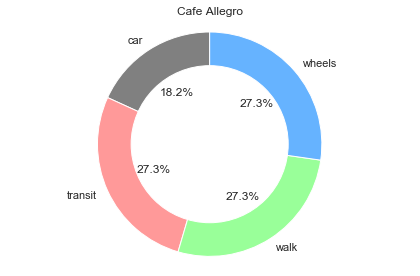

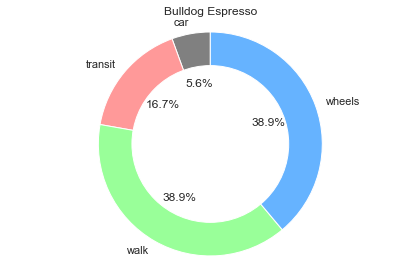

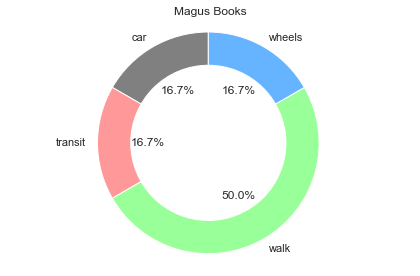

In [338]:
# Pie chart

for u in grouped_data['unit'].unique():
    mini = grouped_data[grouped_data['unit'] == u]
    labels = mini['type']
    sizes = mini['count']
    
    #colors
    colors = ['#808080','#ff9999','#99ff99','#66b3ff']

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=.55)
    #draw circle
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    # Equal aspect ratio ensures that pie is drawn as a circle
    plt.title(u)
    ax1.axis('equal')  
    plt.tight_layout()
    plt.savefig(f'{u}_circle.png')
    plt.show()

In [339]:
grouped_data

,unit,type,count
0,Cafe Allegro,car,2
1,Cafe Allegro,transit,3
2,Cafe Allegro,walk,3
3,Cafe Allegro,wheels,3
4,Bulldog Espresso,car,1
5,Bulldog Espresso,transit,3
6,Bulldog Espresso,walk,7
7,Bulldog Espresso,wheels,7
8,Magus Books,car,1
9,Magus Books,transit,1


In [380]:
data['hour'] = data['timestamp'].apply(lambda s: s.hour)

In [358]:
hour_by_hour = data.groupby(['hour', 'type']).sum().reset_index()

In [383]:
for mode in ['walk', 'wheels', 'transit', 'car']:
    hours = {'hour': [i for i in range(0, 24)], 
             'count': [0 for _ in range(0, 24)], 
             'type': [mode for _ in range(0, 24)]}
    hour_by_hour = hour_by_hour.append(pd.DataFrame(hours))

/Users/aaronlichtner/Documents/modesurvey/dataviz/venv/lib/python3.7/site-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [439]:
hour_by_hour['hour'] = hour_by_hour['hour'].astype(int)

In [457]:
d1 = hour_by_hour[hour_by_hour['type'] == 'walk']
d2 = hour_by_hour[hour_by_hour['type'] == 'wheels']
d3 = hour_by_hour[hour_by_hour['type'] == 'transit']
d4 = hour_by_hour[hour_by_hour['type'] == 'car']

d1 = d1.sort_values('hour').reset_index(drop=True, inplace=False)
d2 = d2.sort_values('hour').reset_index(drop=True, inplace=False)
d3 = d3.sort_values('hour').reset_index(drop=True, inplace=False)
d4 = d4.sort_values('hour').reset_index(drop=True, inplace=False)

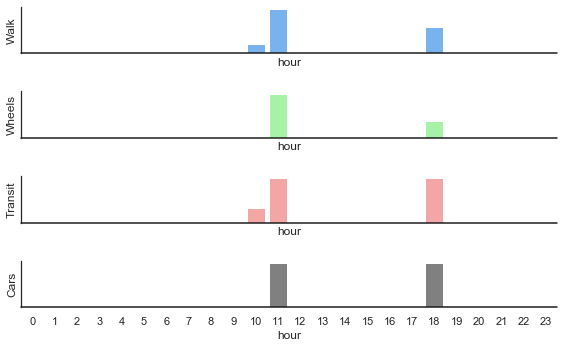

In [458]:
sns.set(style="white")
rs = np.random.RandomState(8)

# Set up the matplotlib figure
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(8, 5), sharex=True)

# Generate some sequential data
x = np.array(list("ABCDEFGHIJ"))
sns.barplot(x=d1['hour'], y=d1['count'], color=colors[0], ax=ax1, ci=None)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Walk")

# Center the data to make it diverging
sns.barplot(x=d2['hour'], y=d2['count'], color=colors[1], ax=ax2, ci=None)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel("Wheels")

# Randomly reorder the data to make it qualitative
sns.barplot(x=d3['hour'], y=d3['count'], color=colors[2], ax=ax3, ci=None)
ax3.axhline(0, color="k", clip_on=False)
ax3.set_ylabel("Transit")

# Randomly reorder the data to make it qualitative
sns.barplot(x=d4['hour'], y=d4['count'], color=colors[3], ax=ax4, ci=None)
ax4.axhline(0, color="k", clip_on=False)
ax4.set_ylabel("Cars")

# Finalize the plot
sns.despine(bottom=True)
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=2)

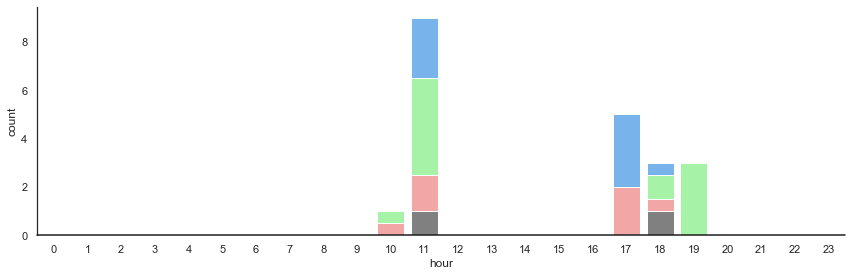

In [459]:
sns.set(style="white")
rs = np.random.RandomState(8)

# Set up the matplotlib figure
figure = plt.figure(figsize=(12, 4))

# Generate some sequential data
sns.barplot(x=d1['hour'], y=d1['count']+d4['count']+d3['count']+d2['count'], color=colors[0], ci=None)
#ax1.set_ylabel("Walk")

# Center the data to make it diverging
sns.barplot(x=d2['hour'], y=d2['count']+d4['count']+d3['count'], color=colors[1], ci=None)
#ax2.set_ylabel("Wheels")

# Randomly reorder the data to make it qualitative
sns.barplot(x=d3['hour'], y=d3['count']+d4['count'], color=colors[2], ci=None)
#ax3.set_ylabel("Transit")

# Randomly reorder the data to make it qualitative
sns.barplot(x=d4['hour'], y=d4['count'], color=colors[3], ci=None)
plt.axhline(0, color="k", clip_on=False)
#ax4.set_ylabel("Cars")


# Finalize the plot
sns.despine(bottom=True)
#plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=2)

In [462]:
d3

,count,hour,type
0,0,0,transit
1,0,1,transit
2,0,2,transit
3,0,3,transit
4,0,4,transit
5,0,5,transit
6,0,6,transit
7,0,7,transit
8,0,8,transit
9,0,9,transit


In [438]:
hour_by_hour

,count,hour,type
0,1,10,transit
1,1,10,walk
2,2,11,car
3,3,11,transit
4,5,11,walk
...,...,...,...
19,0,19,car
20,0,20,car
21,0,21,car
22,0,22,car
